In [1]:
# #시각화 초기셋팅
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina' #그래프 화질 높이기

# 데이터셋 불러오기 & 전처리

## naver_movie 

In [4]:
df = pd.read_csv('naver_movie(utf-8).csv', encoding="utf-8")

In [5]:
df

,Unnamed: 0,title,director,genre,time,country,point,grade,year,date,actor,movie_cd
0,0,1987,장준환,드라마,129.0,한국,9.23,15세 관람가,2017.0,2017.12.27,김윤석/하정우/유해진/김태리/박희순/이희준/유승목/현봉식/박지환/이용직/박지홍/김경...,20170590
1,1,1급기밀,홍기선,드라마,101.0,한국,8.89,12세 관람가,2018.0,2018.01.24,김상경/김옥빈/최무성/최귀화/김병철/서현우/황보라/김경남/이항나/이지원/지건우/성병...,20168161
2,2,48미터,민백두,드라마,97.0,한국,8.94,15세 관람가,2013.0,2013.07.04,박효주/이진희/하석/조한철/안세호/주민하/김용진/지안/김광현/강윤서,20120801
3,3,4등,정지우,드라마,116.0,한국,8.56,15세 관람가,2016.0,2016.04.13,박해준/이항나/유재상/최무성/정가람/유재명/곽민석/서환희/남문철,20145182
4,4,82년생 김지영,김도영,드라마,118.0,한국,6.68,12세 관람가,2019.0,2019.10.23,정유미/공유/김미경/공민정/박성연/이봉련/김성철/이얼/김미경/손성찬/강애심/류아영/김정영,20191029
...,...,...,...,...,...,...,...,...,...,...,...,...
688,688,희생부활자,곽경택,미스터리,91.0,한국,6.02,15세 관람가,2017.0,2017.10.12,김래원/김해숙/성동일/전혜진/장영남/김민준/정기섭/오대환/전광진/백봉기/이준혁/김주...,20154907
689,689,서부전선,천성일,전쟁,112.0,한국,6.37,12세 관람가,2015.0,2015.09.24,설경구/여진구/이경영/정성화/정인기/조희봉/김원해/정석원/김선영/노영학/강윤제/한철...,20140193
690,690,인천상륙작전,이재한,전쟁,110.0,한국,8.04,12세 관람가,2016.0,2016.07.27,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20156250
691,691,인천상륙작전 : 익스텐디드 에디션(확장판),이재한,전쟁,141.0,한국,6.92,15세 관람가,2016.0,2016.09.13,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20160041


## naver_movie 데이터 전처리

In [6]:
# 필요없는 컬럼 쳐내기
# 첫번째 컬럼 삭제
df = df.iloc[:,1:]
df

,title,director,genre,time,country,point,grade,year,date,actor,movie_cd
0,1987,장준환,드라마,129.0,한국,9.23,15세 관람가,2017.0,2017.12.27,김윤석/하정우/유해진/김태리/박희순/이희준/유승목/현봉식/박지환/이용직/박지홍/김경...,20170590
1,1급기밀,홍기선,드라마,101.0,한국,8.89,12세 관람가,2018.0,2018.01.24,김상경/김옥빈/최무성/최귀화/김병철/서현우/황보라/김경남/이항나/이지원/지건우/성병...,20168161
2,48미터,민백두,드라마,97.0,한국,8.94,15세 관람가,2013.0,2013.07.04,박효주/이진희/하석/조한철/안세호/주민하/김용진/지안/김광현/강윤서,20120801
3,4등,정지우,드라마,116.0,한국,8.56,15세 관람가,2016.0,2016.04.13,박해준/이항나/유재상/최무성/정가람/유재명/곽민석/서환희/남문철,20145182
4,82년생 김지영,김도영,드라마,118.0,한국,6.68,12세 관람가,2019.0,2019.10.23,정유미/공유/김미경/공민정/박성연/이봉련/김성철/이얼/김미경/손성찬/강애심/류아영/김정영,20191029
...,...,...,...,...,...,...,...,...,...,...,...
688,희생부활자,곽경택,미스터리,91.0,한국,6.02,15세 관람가,2017.0,2017.10.12,김래원/김해숙/성동일/전혜진/장영남/김민준/정기섭/오대환/전광진/백봉기/이준혁/김주...,20154907
689,서부전선,천성일,전쟁,112.0,한국,6.37,12세 관람가,2015.0,2015.09.24,설경구/여진구/이경영/정성화/정인기/조희봉/김원해/정석원/김선영/노영학/강윤제/한철...,20140193
690,인천상륙작전,이재한,전쟁,110.0,한국,8.04,12세 관람가,2016.0,2016.07.27,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20156250
691,인천상륙작전 : 익스텐디드 에디션(확장판),이재한,전쟁,141.0,한국,6.92,15세 관람가,2016.0,2016.09.13,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20160041


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     693 non-null    object 
 1   director  693 non-null    object 
 2   genre     693 non-null    object 
 3   time      693 non-null    float64
 4   country   693 non-null    object 
 5   point     693 non-null    float64
 6   grade     693 non-null    object 
 7   year      693 non-null    float64
 8   date      693 non-null    object 
 9   actor     693 non-null    object 
 10  movie_cd  693 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 59.7+ KB


In [8]:
df.describe()

,time,point,year,movie_cd
count,693.000000,693.000000,693.000000,6.930000e+02
mean,108.111111,7.260188,2016.845599,2.016333e+07
std,17.054590,1.407487,2.945183,3.132476e+04
min,20.000000,0.000000,2012.000000,1.999005e+07
25%,99.000000,6.440000,2014.000000,2.013940e+07
50%,109.000000,7.480000,2017.000000,2.016234e+07
75%,119.000000,8.350000,2019.000000,2.018732e+07
max,180.000000,10.000000,2022.000000,2.022448e+07


## movie_audience


In [9]:
# 관객수 데이터셋 가져오기
df_audi = pd.read_csv('movie_audience.csv')
df_audi

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531~20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0
1,20220531~20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0
2,20220531~20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0
3,20220531~20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0
4,20220531~20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41814,20120101~20120101,라이온 킹,19940256,45750,171285,-11699,507115500,1841625000,244.0,895.0
41815,20120101~20120101,오싹한 연애,20113381,45062,2823060,-15926,344871000,20634684500,243.0,839.0
41816,20120101~20120101,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,24202,285959,-7756,167809500,1897120000,186.0,348.0
41817,20120101~20120101,앨빈과 슈퍼밴드3,20113311,19729,516289,-6461,137030000,3416675000,169.0,359.0


## movie_audience 데이터 전처리

In [10]:
# 잘못들어간 데이터 삭제
df_audi[df_audi['영화코드'] == 2]

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
10,0,1,2,3,4,5,6,7,0.0,0.0
21,0,1,2,3,4,5,6,7,0.0,0.0
32,0,1,2,3,4,5,6,7,0.0,0.0
43,0,1,2,3,4,5,6,7,0.0,0.0
54,0,1,2,3,4,5,6,7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41764,0,1,2,3,4,5,6,7,8.0,9.0
41775,0,1,2,3,4,5,6,7,8.0,9.0
41786,0,1,2,3,4,5,6,7,8.0,9.0
41797,0,1,2,3,4,5,6,7,8.0,9.0


In [11]:
lst = list(df_audi[df_audi['영화코드'] == 2].index)
lst

[10,
 21,
 32,
 43,
 54,
 65,
 76,
 87,
 98,
 109,
 120,
 131,
 142,
 153,
 164,
 175,
 186,
 197,
 208,
 219,
 230,
 241,
 252,
 263,
 274,
 285,
 296,
 307,
 318,
 329,
 340,
 351,
 362,
 373,
 384,
 395,
 406,
 417,
 428,
 439,
 450,
 461,
 472,
 483,
 494,
 505,
 516,
 527,
 538,
 549,
 560,
 571,
 582,
 593,
 604,
 615,
 626,
 637,
 648,
 659,
 670,
 681,
 692,
 703,
 714,
 725,
 736,
 747,
 758,
 769,
 780,
 791,
 802,
 813,
 824,
 835,
 846,
 857,
 868,
 879,
 890,
 901,
 912,
 923,
 934,
 945,
 956,
 967,
 978,
 989,
 1000,
 1011,
 1022,
 1033,
 1044,
 1055,
 1066,
 1077,
 1088,
 1099,
 1110,
 1121,
 1132,
 1143,
 1154,
 1165,
 1176,
 1187,
 1198,
 1209,
 1220,
 1231,
 1242,
 1253,
 1264,
 1275,
 1286,
 1297,
 1308,
 1319,
 1330,
 1341,
 1352,
 1363,
 1374,
 1395,
 1406,
 1417,
 1428,
 1439,
 1450,
 1461,
 1472,
 1483,
 1494,
 1505,
 1516,
 1527,
 1538,
 1549,
 1560,
 1571,
 1582,
 1593,
 1604,
 1615,
 1626,
 1637,
 1648,
 1659,
 1670,
 1681,
 1692,
 1703,
 1714,
 1725,
 1736,


In [12]:
df_audi = df_audi.drop(lst)
df_audi

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531~20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0
1,20220531~20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0
2,20220531~20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0
3,20220531~20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0
4,20220531~20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41814,20120101~20120101,라이온 킹,19940256,45750,171285,-11699,507115500,1841625000,244.0,895.0
41815,20120101~20120101,오싹한 연애,20113381,45062,2823060,-15926,344871000,20634684500,243.0,839.0
41816,20120101~20120101,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,24202,285959,-7756,167809500,1897120000,186.0,348.0
41817,20120101~20120101,앨빈과 슈퍼밴드3,20113311,19729,516289,-6461,137030000,3416675000,169.0,359.0


In [13]:
# 삭제 잘 된건지 확인- 아무것도 안떠야 잘 삭제된것.
df_audi[df_audi['영화코드'] == 2]

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수


날짜 컬럼 정리

In [14]:
# 테스트- 문자열을 원하는 길이만큼 자르기
d = 'hello'
d[:3]

'hel'

In [15]:
# 날짜 컬럼 정리
lst = list(df_audi['날짜'])

day_lst = []

for kk in lst:
  k = kk[:8]
  day_lst.append(k)

day_lst

['20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220531',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220530',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220529',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220528',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220527',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220526',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220525',
 '20220524',
 '20220524',
 '20220524',
 '20220524',
 '20220524',
 '20220524',
 '20220524',

In [16]:
df_audi['날짜'] = day_lst
df_audi

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41814,20120101,라이온 킹,19940256,45750,171285,-11699,507115500,1841625000,244.0,895.0
41815,20120101,오싹한 연애,20113381,45062,2823060,-15926,344871000,20634684500,243.0,839.0
41816,20120101,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,24202,285959,-7756,167809500,1897120000,186.0,348.0
41817,20120101,앨빈과 슈퍼밴드3,20113311,19729,516289,-6461,137030000,3416675000,169.0,359.0


In [17]:
df_audi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38020 entries, 0 to 41818
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          38020 non-null  object 
 1   영화제목        38020 non-null  object 
 2   영화코드        38020 non-null  int64  
 3   일일 관객수      38020 non-null  int64  
 4   누적 관객수      38020 non-null  int64  
 5   전일 대비 증감분   38020 non-null  int64  
 6   일일 매출액      38020 non-null  int64  
 7   누적 매출액      38020 non-null  int64  
 8   일일 상영 스크린수  38020 non-null  float64
 9   일일 상영횟수     38020 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.2+ MB


# 누적 관객수를 토대로 각 비율 보기
- 100 ~ 300만
- 300 ~ 500만
- 500 ~ 700만
- 700 ~ 1000만


In [18]:
# 누적 관객수 가져오기 - 중복된것들중 제일 최근 데이터로
df1 = df_audi.drop_duplicates('영화제목')
df1

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41664,20120115,프렌즈: 몬스터섬의비밀,20113271,15973,498686,-369,115313500,3662498000,189.0,387.0
41708,20120111,다크아워,20113652,4931,142322,-5507,37259500,1165058500,215.0,650.0
41741,20120108,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,12541,349214,-3789,86262000,2314523500,152.0,243.0
41784,20120104,앨빈과 슈퍼밴드3,20113311,5339,536791,-2595,34123500,3547001000,124.0,247.0


In [19]:
# 잘 나온건지 '범죄도시2'로 테스트 - 범죄도시의 최근 데이터는 20220531이 제일 최근 데이터임.
df1[df1['영화제목'] == '범죄도시 2']

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0


범죄도시2는 현재(22/06/14) 기준으로 1050만 누적관객수를 보유하고있으나 이 데이터는 22/05/31 까지의 데이터라 반영이 안되있음.

## 레벨

In [20]:
# 레벨 나누기
# 100만 미만 -> 1
# 100 ~ 300만 -> 2
# 300 ~ 500만 -> 3
# 500 ~ 700만 -> 4
# 700 ~ 1000만 -> 5

# 굳이 변수에 할당 안해도 되긴하는데 걍 알아보기 쉽게 일부로 변수에 할당해서 사용함.
level1 = df1['누적 관객수'] < 1000000
level2 = (df1['누적 관객수'] >= 1000000) & (df1['누적 관객수'] < 3000000)
level3 = (df1['누적 관객수'] >= 3000000) & (df1['누적 관객수'] < 5000000)
level4 = (df1['누적 관객수'] >= 5000000) & (df1['누적 관객수'] < 7000000)
level5 = df1['누적 관객수'] >= 7000000  # TODO: 만약 1000만 이상은 따로 구분하고싶으면 레벨 6 한개 더 만들어서 하면됨.

df1['누적Level'] = 1
df1.loc[level2, '누적Level'] = 2
df1.loc[level3, '누적Level'] = 3
df1.loc[level4, '누적Level'] = 4
df1.loc[level5, '누적Level'] = 5

df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0,5
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0,4
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0,1
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0,1
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
41664,20120115,프렌즈: 몬스터섬의비밀,20113271,15973,498686,-369,115313500,3662498000,189.0,387.0,1
41708,20120111,다크아워,20113652,4931,142322,-5507,37259500,1165058500,215.0,650.0,1
41741,20120108,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,12541,349214,-3789,86262000,2314523500,152.0,243.0,1
41784,20120104,앨빈과 슈퍼밴드3,20113311,5339,536791,-2595,34123500,3547001000,124.0,247.0,1


각 레벨별 갯수 센 후 전체 비율중 몇퍼를 차지하는지 비율 구하기

In [21]:
# 각 레벨별 갯수 세기

# 전체 갯수 - 컬럼은 아무거나 지정해도됨. 갯수만 세면 되서
all = df1.loc[: , '날짜'].count() # 2657개

# 레벨1 갯수
count1 = df1.loc[df1['누적Level'] == 1, '날짜'].count()
# 레벨2 갯수
count2 = df1.loc[df1['누적Level'] == 2, '날짜'].count()
# 레벨3 갯수 
count3 = df1.loc[df1['누적Level'] == 3, '날짜'].count()
# 레벨4 갯수 
count4 = df1.loc[df1['누적Level'] == 4, '날짜'].count()
# 레벨5 갯수
count5 = df1.loc[df1['누적Level'] == 5, '날짜'].count()

# 잘 구해졌나 확인 - True 나오면 잘 구해진것.
all == count1 + count2 + count3 + count4 + count5

True

In [22]:
# 각 레벨의 비율 구하기
ratio1 = count1 / all * 100
ratio2 = count2 / all * 100
ratio3 = count3 / all * 100
ratio4 = count4 / all * 100
ratio5 = count5 / all * 100

# 비율 잘 구해졌나 확인 - 100퍼에 가깝게만 나오면 됨.
ratio1 + ratio2 + ratio3 + ratio4 + ratio5

99.99999999999999

In [23]:
# 비율 데이터셋 만들기
data = {
    'level' : [1,2,3,4,5],
    'ratio' : [ratio1, ratio2, ratio3, ratio4, ratio5],
    'count' : [count1, count2, count3, count4, count5]
}

df1_1 = pd.DataFrame(data)
df1_1

,level,ratio,count
0,1,82.913060,2203
1,2,10.688747,284
2,3,3.236733,86
3,4,1.392548,37
4,5,1.768912,47


In [24]:
# 비율 소수점 둘째짜리까지 반올림 하기
df1_1['ratio'] = np.round(df1_1['ratio'],2)
df1_1['ratio']

0    82.91
1    10.69
2     3.24
3     1.39
4     1.77
Name: ratio, dtype: float64

In [25]:
df1_1['ratio'].sum()

99.99999999999999

In [26]:
df1_1['count'].sum()

2657

## 파이차트로 시각화

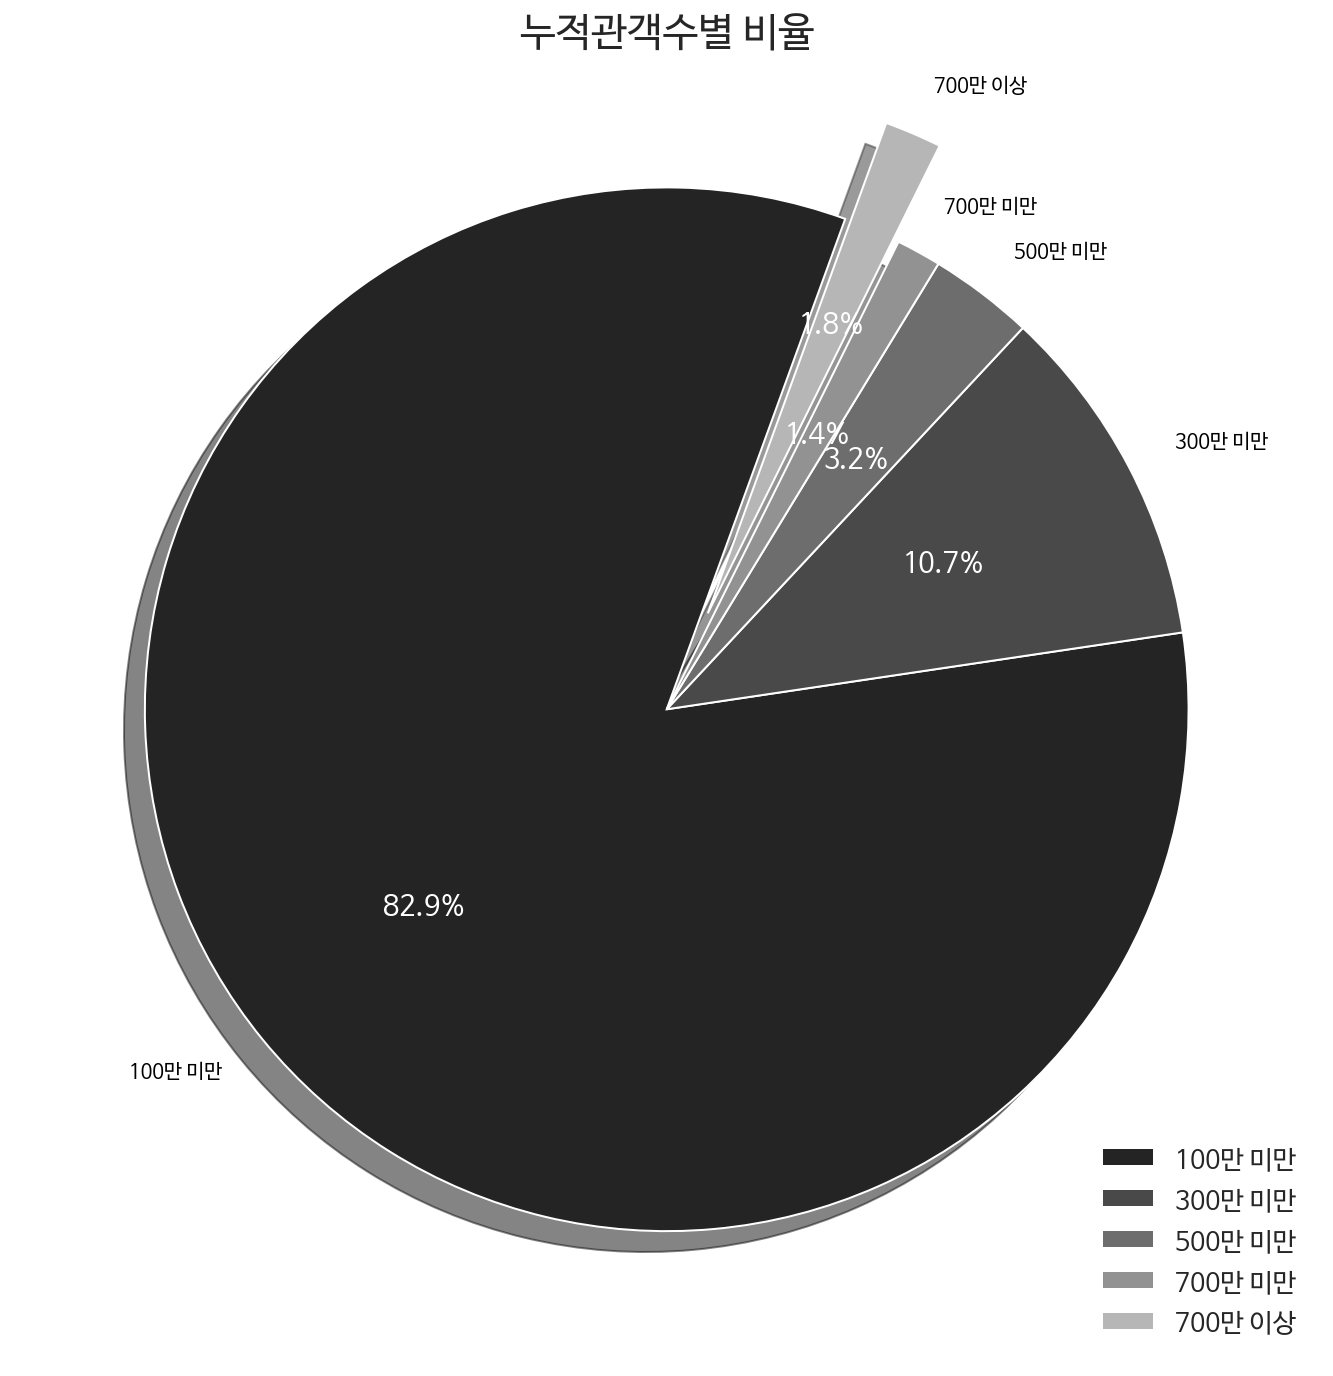

In [27]:
# 파이차트 - off 비중
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(12, 12))

colors = sns.color_palette("binary_r",6)

labels = ['100만 미만', '300만 미만', '500만 미만', '700만 미만', '700만 이상']

sizes = df1_1['ratio']

explode = (0,0,0,0,0.2)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    startangle=70
)

# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(10)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(14)
  t.set_color('white')
  
plt.title("누적관객수별 비율", fontsize = 20)
plt.legend(labels,loc='lower right', frameon=False, fontsize = 13)
plt.show()

# 개봉시기는 흥행요소에 영향을 끼치는지

## 분석1
- 연도 별로 보았을 때 어떠한 달에 영화들이 흥행하는 지 살펴보고
- 특정한 달( 1-3월 기간)이 있다면 어떠한 이유 때문인가?(연휴, 명절영향)

In [28]:
df

,title,director,genre,time,country,point,grade,year,date,actor,movie_cd
0,1987,장준환,드라마,129.0,한국,9.23,15세 관람가,2017.0,2017.12.27,김윤석/하정우/유해진/김태리/박희순/이희준/유승목/현봉식/박지환/이용직/박지홍/김경...,20170590
1,1급기밀,홍기선,드라마,101.0,한국,8.89,12세 관람가,2018.0,2018.01.24,김상경/김옥빈/최무성/최귀화/김병철/서현우/황보라/김경남/이항나/이지원/지건우/성병...,20168161
2,48미터,민백두,드라마,97.0,한국,8.94,15세 관람가,2013.0,2013.07.04,박효주/이진희/하석/조한철/안세호/주민하/김용진/지안/김광현/강윤서,20120801
3,4등,정지우,드라마,116.0,한국,8.56,15세 관람가,2016.0,2016.04.13,박해준/이항나/유재상/최무성/정가람/유재명/곽민석/서환희/남문철,20145182
4,82년생 김지영,김도영,드라마,118.0,한국,6.68,12세 관람가,2019.0,2019.10.23,정유미/공유/김미경/공민정/박성연/이봉련/김성철/이얼/김미경/손성찬/강애심/류아영/김정영,20191029
...,...,...,...,...,...,...,...,...,...,...,...
688,희생부활자,곽경택,미스터리,91.0,한국,6.02,15세 관람가,2017.0,2017.10.12,김래원/김해숙/성동일/전혜진/장영남/김민준/정기섭/오대환/전광진/백봉기/이준혁/김주...,20154907
689,서부전선,천성일,전쟁,112.0,한국,6.37,12세 관람가,2015.0,2015.09.24,설경구/여진구/이경영/정성화/정인기/조희봉/김원해/정석원/김선영/노영학/강윤제/한철...,20140193
690,인천상륙작전,이재한,전쟁,110.0,한국,8.04,12세 관람가,2016.0,2016.07.27,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20156250
691,인천상륙작전 : 익스텐디드 에디션(확장판),이재한,전쟁,141.0,한국,6.92,15세 관람가,2016.0,2016.09.13,이정재/이범수/리암 니슨/진세연/정준호/박철민/김병옥/존 그리스/길금성/신수항/김희...,20160041


In [29]:
df1

,날짜,영화제목,영화코드,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20220531,범죄도시 2,20204548,265350,7013525,63932,2642772620,72495151380,0.0,0.0,5
1,20220531,닥터 스트레인지: 대혼돈의 멀티버스,20212855,30422,5803776,11450,318679710,61798271700,0.0,0.0,4
2,20220531,그대가 조국,20224634,17310,189737,2416,169236980,1801689510,0.0,0.0,1
3,20220531,피는 물보다 진하다,20224304,2424,12212,1224,13320500,78773100,0.0,0.0,1
4,20220531,안녕하세요,20217334,2323,19498,1325,17312400,148485860,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
41664,20120115,프렌즈: 몬스터섬의비밀,20113271,15973,498686,-369,115313500,3662498000,189.0,387.0,1
41708,20120111,다크아워,20113652,4931,142322,-5507,37259500,1165058500,215.0,650.0,1
41741,20120108,극장판 포켓몬스터 베스트 위시「비크티니와 백의 영웅 레시라무」,20112709,12541,349214,-3789,86262000,2314523500,152.0,243.0,1
41784,20120104,앨빈과 슈퍼밴드3,20113311,5339,536791,-2595,34123500,3547001000,124.0,247.0,1


In [30]:
# 흥행의 기준은
# 레벨5인 700만 이상만 잡기엔 부족하니
# 레벨 4까지를 흥행의 기준으로 잡기
# 레벨4 + 레벨5 : 흥행의 기준
df1_1

,level,ratio,count
0,1,82.91,2203
1,2,10.69,284
2,3,3.24,86
3,4,1.39,37
4,5,1.77,47


### 개봉일 기준

In [31]:
## 누적레벨 전부 다 보면
# df1에서 레벨 4,5만 추린후 df 에서 개봉일 가져와서 합치기
f = df1.copy()
d = df.loc[:,['movie_cd','date']]

d.rename(
    columns={
        'movie_cd' : '영화코드',
        'date' : '개봉일'
        },
    inplace = True
)

df2_1 = pd.merge(d,f, on='영화코드', how='inner')
df2_1

,영화코드,개봉일,날짜,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20170590,2017.12.27,20180207,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0,5
1,20168161,2018.01.24,20180131,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0,1
2,20120801,2013.07.04,20130709,48미터,1127,5907,415,8366500,45691500,33.0,93.0,1
3,20145182,2016.04.13,20160418,4등,1260,18049,-2044,8977500,146941500,174.0,381.0,1
4,20191029,2019.10.23,20191203,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688,20154907,2017.10.12,20171018,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0,1
689,20140193,2015.09.24,20151008,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0,1
690,20156250,2016.07.27,20160906,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0,5
691,20160041,2016.09.13,20160919,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0,1


In [32]:
df2_1.groupby('누적Level')[['영화코드']].count()

,영화코드
누적Level,
1,468
2,137
3,39
4,18
5,31


In [33]:
# 개봉일을 날짜 데이터와 동일한 형식으로

a_lst = []

for a in df2_1['개봉일']:
  a = a.replace('.','')
  a_lst.append(a)

df2_1['개봉일'] = a_lst
df2_1['개봉일']

0      20171227
1      20180124
2      20130704
3      20160413
4      20191023
         ...   
688    20171012
689    20150924
690    20160727
691    20160913
692    20190925
Name: 개봉일, Length: 693, dtype: object

In [34]:
# 날짜 컬럼명을 마지막 상영일로 변경하기
df2_1.rename(columns={'날짜' : '마지막상영일'}, inplace = True)
df2_1

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20170590,20171227,20180207,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0,5
1,20168161,20180124,20180131,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0,1
2,20120801,20130704,20130709,48미터,1127,5907,415,8366500,45691500,33.0,93.0,1
3,20145182,20160413,20160418,4등,1260,18049,-2044,8977500,146941500,174.0,381.0,1
4,20191029,20191023,20191203,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688,20154907,20171012,20171018,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0,1
689,20140193,20150924,20151008,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0,1
690,20156250,20160727,20160906,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0,5
691,20160041,20160913,20160919,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0,1


In [35]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 692
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   영화코드        693 non-null    int64  
 1   개봉일         693 non-null    object 
 2   마지막상영일      693 non-null    object 
 3   영화제목        693 non-null    object 
 4   일일 관객수      693 non-null    int64  
 5   누적 관객수      693 non-null    int64  
 6   전일 대비 증감분   693 non-null    int64  
 7   일일 매출액      693 non-null    int64  
 8   누적 매출액      693 non-null    int64  
 9   일일 상영 스크린수  693 non-null    float64
 10  일일 상영횟수     693 non-null    float64
 11  누적Level     693 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 70.4+ KB


In [36]:
gddoj = '20171227'
gddoj[4:6]

'12'

In [37]:
# 날짜 파싱하려는데 자꾸 day is out of range for month: 0 로 뜸.
# 해당월의 최대일수를 넘은게 있는지 확인
# 제일 유력후보는 2월
# 2월 부터 확인

p_lst = []

for p in df2_1['개봉일']:
  if (p[4:] >= '0201') & (p[4:] < '0301'):
    p = pd.to_datetime(p)
    p_lst.append(p)

  else:
    pass

p_lst

[Timestamp('2021-02-18 00:00:00'),
 Timestamp('2021-02-24 00:00:00'),
 Timestamp('2014-02-13 00:00:00'),
 Timestamp('2022-02-24 00:00:00'),
 Timestamp('2016-02-24 00:00:00'),
 Timestamp('2017-02-15 00:00:00'),
 Timestamp('2013-02-06 00:00:00'),
 Timestamp('2021-02-17 00:00:00'),
 Timestamp('2016-02-17 00:00:00'),
 Timestamp('2014-02-06 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2021-02-18 00:00:00'),
 Timestamp('2016-02-24 00:00:00'),
 Timestamp('2014-02-13 00:00:00'),
 Timestamp('2017-02-22 00:00:00'),
 Timestamp('2021-02-10 00:00:00'),
 Timestamp('2019-02-27 00:00:00'),
 Timestamp('2017-02-15 00:00:00'),
 Timestamp('2019-02-13 00:00:00'),
 Timestamp('2019-02-27 00:00:00'),
 Timestamp('2018-02-14 00:00:00'),
 Timestamp('2016-02-11 00:00:00'),
 Timestamp('2016-02-25 00:00:00'),
 Timestamp('2013-02-14 00:00:00'),
 Timestamp('2012-02-29 00:00:00'),
 Timestamp('2021-02-10 00:00:00'),
 Timestamp('2015-02-05 00:00:00'),
 Timestamp('2019-02-27 00:00:00'),
 Timestamp('2022-02-

2월은 문제없음. 그렇다면 다음 유력후보는 day가 31이거나 30일 인거?

In [38]:
# day가 30일 이거나 31일인것들중 에러 확인
p_lst = []

for p in df2_1['개봉일']:
  if (p[6:] >= '30'):
    p = pd.to_datetime(p)
    p_lst.append(p)

  else:
    pass

p_lst

[Timestamp('2014-12-31 00:00:00'),
 Timestamp('2019-05-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2014-10-30 00:00:00'),
 Timestamp('2013-10-30 00:00:00'),
 Timestamp('2012-05-31 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2013-05-30 00:00:00'),
 Timestamp('2020-12-30 00:00:00'),
 Timestamp('2012-10-31 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2014-04-30 00:00:00'),
 Timestamp('2018-10-31 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2015-12-30 00:00:00'),
 Timestamp('2020-07-30 00:00:00'),
 Timestamp('2018-05-30 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2012-05-30 00:00:00'),
 Timestamp('2013-10-30 00:00:00'),
 Timestamp('2013-07-31 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2012-08-30 00:00:00'),
 Timestamp('2016-03-30 00:00:00'),
 Timestamp('2017-08-30 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2012-05-

얘도 문제없음...

In [39]:
df2_1[df2_1['개봉일'] == '0']

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
591,19990140,0,20160510,인생은 아름다워,1442,119841,205,8244300,809673200,72.0,137.0,1


얘 때문에 날짜 파싱 계속 오류났었음. 이거 지우니까 이제 날짜 파싱 잘됨.

In [40]:
# 삭제
df2_1 = df2_1.drop(591)

In [41]:
# 잘 삭제됬는지 확인.
df2_1[df2_1['개봉일'] == '0']

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level


In [42]:
df2_1

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20170590,20171227,20180207,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0,5
1,20168161,20180124,20180131,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0,1
2,20120801,20130704,20130709,48미터,1127,5907,415,8366500,45691500,33.0,93.0,1
3,20145182,20160413,20160418,4등,1260,18049,-2044,8977500,146941500,174.0,381.0,1
4,20191029,20191023,20191203,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688,20154907,20171012,20171018,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0,1
689,20140193,20150924,20151008,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0,1
690,20156250,20160727,20160906,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0,5
691,20160041,20160913,20160919,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0,1


In [43]:
# 개봉일, 마지막 상영일 날짜파싱하기
df2_1['개봉일'] = pd.to_datetime(df2_1['개봉일'])
df2_1['마지막상영일'] = pd.to_datetime(df2_1['마지막상영일'])

df2_1

,영화코드,개봉일,마지막상영일,영화제목,일일 관객수,누적 관객수,전일 대비 증감분,일일 매출액,누적 매출액,일일 상영 스크린수,일일 상영횟수,누적Level
0,20170590,2017-12-27,2018-02-07,1987,9410,7201087,1549,68214600,57934612645,405.0,709.0,5
1,20168161,2018-01-24,2018-01-31,1급기밀,4322,200090,-11072,26619000,1592776900,168.0,279.0,1
2,20120801,2013-07-04,2013-07-09,48미터,1127,5907,415,8366500,45691500,33.0,93.0,1
3,20145182,2016-04-13,2016-04-18,4등,1260,18049,-2044,8977500,146941500,174.0,381.0,1
4,20191029,2019-10-23,2019-12-03,82년생 김지영,2792,3671152,245,21681220,30244988930,166.0,229.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688,20154907,2017-10-12,2017-10-18,희생부활자,18054,300737,-3638,129406600,2356707035,606.0,2352.0,1
689,20140193,2015-09-24,2015-10-08,서부전선,2452,599698,-4219,17642500,4683618500,100.0,134.0,1
690,20156250,2016-07-27,2016-09-06,인천상륙작전,4460,7043241,-964,31154500,55062816503,288.0,565.0,5
691,20160041,2016-09-13,2016-09-19,인천상륙작전 : 익스텐디드 에디션(확장판),853,24710,-1425,5915000,204619700,99.0,171.0,1


In [44]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 692
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   영화코드        692 non-null    int64         
 1   개봉일         692 non-null    datetime64[ns]
 2   마지막상영일      692 non-null    datetime64[ns]
 3   영화제목        692 non-null    object        
 4   일일 관객수      692 non-null    int64         
 5   누적 관객수      692 non-null    int64         
 6   전일 대비 증감분   692 non-null    int64         
 7   일일 매출액      692 non-null    int64         
 8   누적 매출액      692 non-null    int64         
 9   일일 상영 스크린수  692 non-null    float64       
 10  일일 상영횟수     692 non-null    float64       
 11  누적Level     692 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(7), object(1)
memory usage: 70.3+ KB


### 상영기간이 1day로 되있는 영화들 개봉일 수정하기

In [45]:
# 1days 확인
pppp = df2_1['마지막상영일'] - df2_1['개봉일']
ppp = df2_1.loc[pppp == '1days',['영화코드','영화제목','마지막상영일','개봉일']]
ppp

,영화코드,영화제목,마지막상영일,개봉일
145,20223620,소설가의 영화,2022-04-22,2022-04-21
188,20168041,용순,2017-06-09,2017-06-08
209,20200364,정말 먼 곳,2021-03-19,2021-03-18
271,20157986,검은손,2015-04-17,2015-04-16
312,20124054,늑대소년,2012-12-07,2012-12-06
515,20147282,우리별 일호와 얼룩소,2014-02-21,2014-02-20
521,20141598,타이밍,2015-12-11,2015-12-10
652,20209138,좋은 사람,2021-09-10,2021-09-09


In [46]:
ppp.index.to_list()

[145, 188, 209, 271, 312, 515, 521, 652]

In [47]:
# # 음수값들 처리 -> 14,15,29,40
# # 1 day 처리 -> 145,188,209
# # 음수로 나오는 영화들은 개봉일이 재개봉 일자들로 들어갔음.
# # 첫 개봉일로 다시 바꾸기
# test_df.loc[ppp.index.to_list(),'개봉일'] = ['2018-08-01','2017-12-20','2012-10-31','2018-05-22','2016-07-20']



### 레벨4,5 시도했던거

In [48]:
# # df1에서 레벨 4,5만 추린후 df 에서 개봉일 가져와서 합치기
# f = df1[(df1['누적Level'] == 4) | (df1['누적Level'] == 5)]
# d = df.loc[:,['movie_cd','date']]

# d.rename(
#     columns={
#         'movie_cd' : '영화코드',
#         'date' : '개봉일'
#         },
#     inplace = True
# )

# df2_1 = pd.merge(d,f, on='영화코드', how='inner')
# df2_1

In [49]:
# # 개봉일을 날짜 데이터와 동일한 형식으로

# a_lst = []

# for a in df2_1['개봉일']:
#   a = a.replace('.','')
#   a_lst.append(a)

# df2_1['개봉일'] = a_lst
# df2_1['개봉일']

In [50]:
# # 날짜 컬럼명을 마지막 상영일로 변경하기
# df2_1.rename(columns={'날짜' : '마지막상영일'}, inplace = True)
# df2_1

In [51]:
# df2_1.info()

In [52]:
# # 개봉일, 마지막 상영일 날짜파싱하기
# df2_1['개봉일'] = pd.to_datetime(df2_1['개봉일'])
# df2_1['마지막상영일'] = pd.to_datetime(df2_1['마지막상영일'])

# df2_1

In [53]:
# df2_1.info()

In [54]:
# df2_1['마지막상영일'] - df2_1['개봉일']

In [55]:
# # 음수값들 처리 -> 14,15,29,40
# # 1 day 처리 -> 16
# # 음수로 나오는 영화들은 개봉일이 재개봉 일자들로 들어갔음.
# # 첫 개봉일로 다시 바꾸기
# df2_1.loc[[14,15,16,29,40],'개봉일'] = ['2018-08-01','2017-12-20','2012-10-31','2018-05-22','2016-07-20']
# df2_1.loc[[14,15,16,29,40],'개봉일']

In [56]:
# # 변경된것 확인 - 음수값 안나오고 1 days 없으면 됨.
# df2_1['마지막상영일'] - df2_1['개봉일']

### 시각화 전 전처리

In [57]:
# 개봉일 기준으로 확인해보기
df2_1_copy = df2_1.copy()
df2_1_copy['year1'] = df2_1_copy['개봉일'].dt.year

# c_ist = []

# for cc in df2_1_copy['개봉일']:
#   c = cc.strftime('%m')
#   c_ist.append(c)

# df2_1_copy['month1'] = df2_1_copy['개봉일'].dt.month 이렇게 하면 자료형이 int 형으로 나오는데 시각화할때 값이 없는 컬럼들도 자동으로 생겨버림.
# 따라서 month1을 문자형 자료로 만들어야됨. 위에 for문 
df2_1_copy['month1'] = df2_1_copy['개봉일'].dt.month
# df2_1_1 = df2_1_copy.groupby(['year1','month1'])[['누적Level']].mean().reset_index()
df2_1_1 = df2_1_copy.groupby(['year1','month1', '누적Level'])[['영화코드']].count().reset_index()
df2_1_1

,year1,month1,누적Level,영화코드
0,2012,1,1,2
1,2012,1,3,2
2,2012,2,1,1
3,2012,2,2,2
4,2012,3,1,4
...,...,...,...,...
283,2022,3,1,4
284,2022,4,1,9
285,2022,5,1,4
286,2022,5,5,1


In [58]:
df2_1_copy.groupby(['year1','month1', '누적Level'])[['영화코드']].count()

영화코드
year1 month1 누적Level      
2012  1      1           2
             3           2
      2      1           1
             2           2
      3      1           4
...                    ...
2022  3      1           4
      4      1           9
      5      1           4
             5           1
      6      1           4

[288 rows x 1 columns]

In [59]:
df2_1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   year1    288 non-null    int64
 1   month1   288 non-null    int64
 2   누적Level  288 non-null    int64
 3   영화코드     288 non-null    int64
dtypes: int64(4)
memory usage: 9.1 KB


## 분석1-1 시각화

### 개봉일자 기준

#### 시각화 : 흥행영화(누적 관객수 500만 이상)들의 영화개봉 시기

In [60]:
df2_1_opendate_45 = df2_1_1[(df2_1_1['누적Level'] == 4) | (df2_1_1['누적Level'] == 5)]
df2_1_opendate_45 = df2_1_opendate_45.groupby('month1')['영화코드'].sum().reset_index()
df2_1_opendate_45

,month1,영화코드
0,1,6
1,2,1
2,5,3
3,6,2
4,7,9
5,8,9
6,9,5
7,10,3
8,11,2
9,12,9


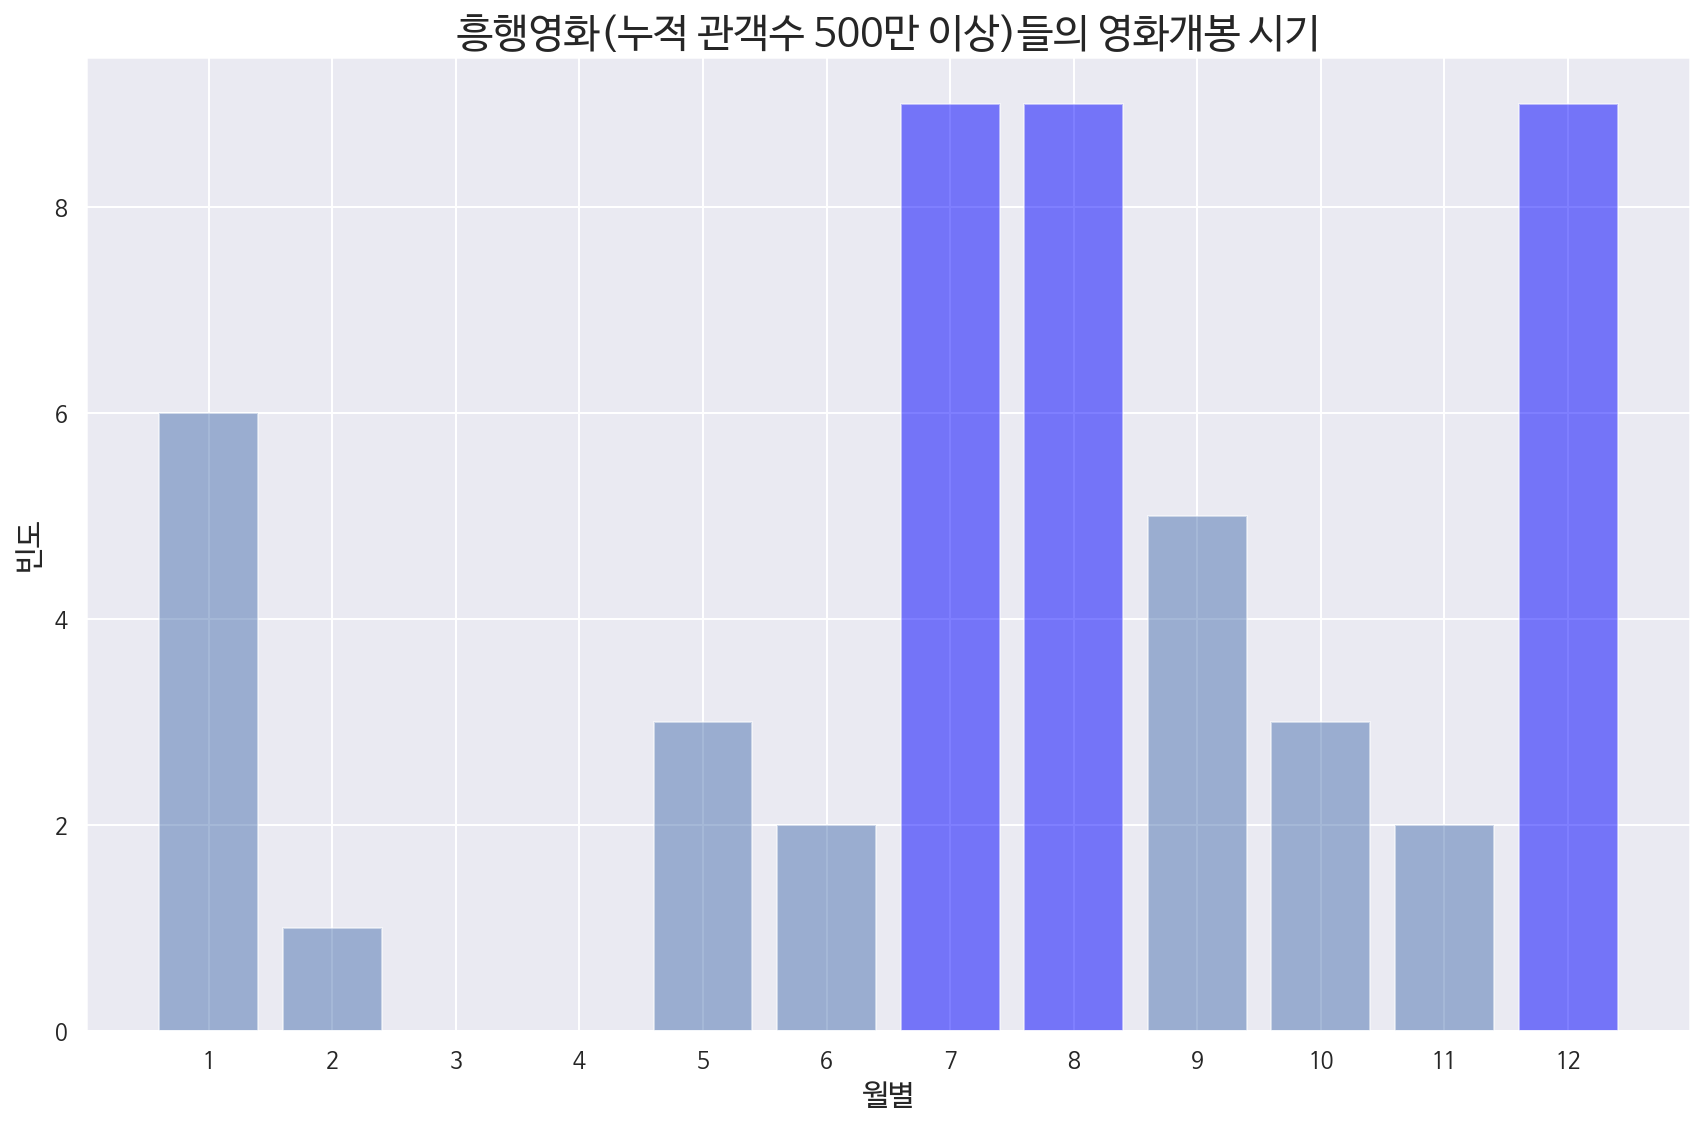

In [61]:
# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (12,8))

x = df2_1_opendate_45['month1']
y = df2_1_opendate_45['영화코드']

colors = ['b' for _ in range(len(x))]
colors[4] = 'blue'
colors[5] = 'blue' 
colors[9] = 'blue' 

plt.bar(x, y, color = colors, alpha=0.5)

plt.xlabel('월별', fontsize=15)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])

plt.ylabel('빈도',fontsize=15)
plt.title('흥행영화(누적 관객수 500만 이상)들의 영화개봉 시기',fontsize = 20)

plt.tight_layout()
plt.show()

- 3,4월은 피하는 경우가 많다. 
- 여름방학, 여름휴가 기간인 7,8월이 가장 많다.
- 7,8월 만큼 많은건 연말인 12월이다.
- 흥행영화(500만 이상)들의 개봉시기 선택은 7,8,12월이다.

#### 시각화 : 흥행저조 영화(누적 관객수 100만 미만)들의 영화개봉 시기

In [62]:
df2_1_opendate_1 = df2_1_1[df2_1_1['누적Level'] == 1]
df2_1_opendate_1 = df2_1_opendate_1.groupby('month1')['영화코드'].sum().reset_index()
df2_1_opendate_1

,month1,영화코드
0,1,35
1,2,34
2,3,38
3,4,48
4,5,41
5,6,43
6,7,31
7,8,26
8,9,40
9,10,48


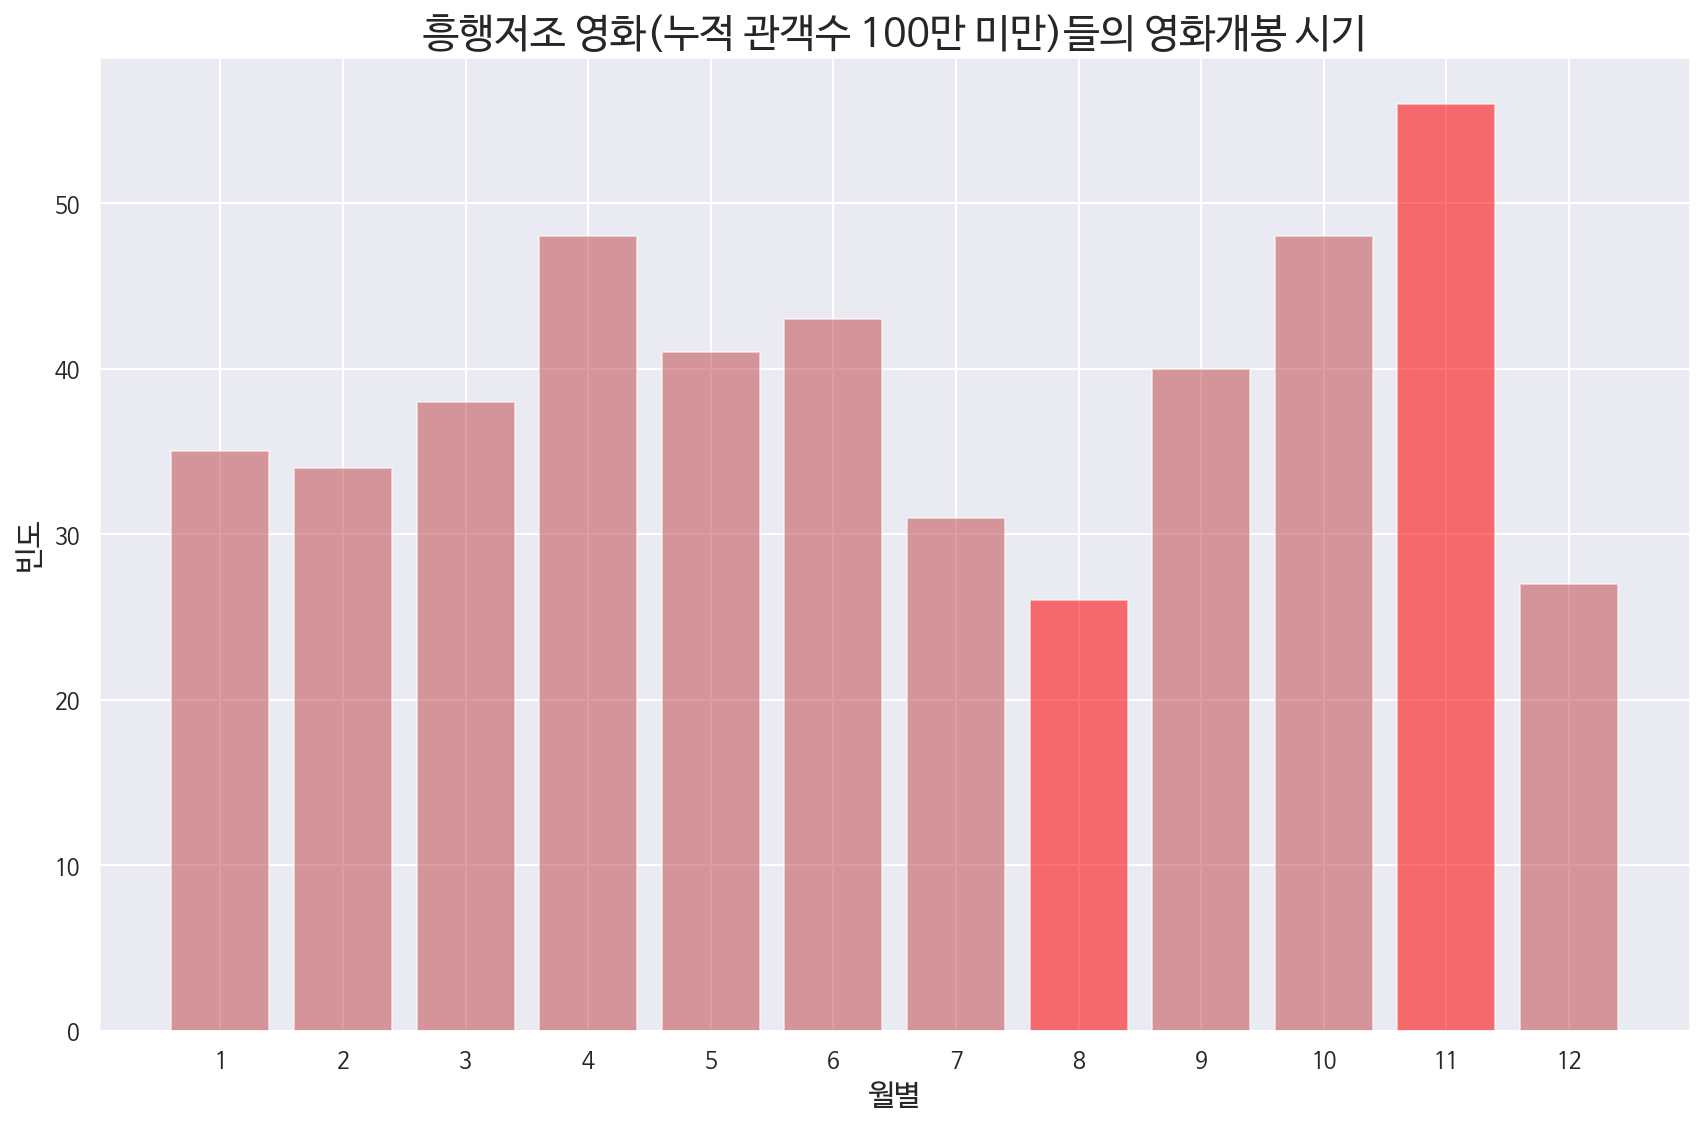

In [63]:
# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (12,8))

x = df2_1_opendate_1['month1']
y = df2_1_opendate_1['영화코드']

colors = ['r' for _ in range(len(x))]
colors[7] = 'red'
colors[10] = 'red' 

plt.bar(x, y, color = colors, alpha=0.55)

plt.xlabel('월별', fontsize=15)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])

plt.ylabel('빈도',fontsize=15)
plt.title('흥행저조 영화(누적 관객수 100만 미만)들의 영화개봉 시기',fontsize = 20)

plt.tight_layout()
plt.show()

- 8월이 가장 적다.
  - 흥행에 성공한 영화들과는 다르다.
  - 개봉전부터 유명한 영화들과의 경쟁을 피하기위한 선택으로 보인다.
- 가장 높은 빈도를 보이는건 11월, 그 다음은 4월,10월.
  - 이것도 역시 경쟁을 피하기위한것으로 보인다.
  - 흥행에 자신있는 영화들은 3,4월은 피하는 경향이 보이는데 흥행에 자신이 없는 영화들은 3,4월에 영화를 개봉해 틈새시장을 노리는것같은 행보를 보인다.
  - 10월과 11월 역시 연말을 노렸다기엔 조금 이른감이 있는데 이것도 위에서 적은대로 흥행에 자신있는 영화들이 연말에 쏟아져나오기때문에 12월 전인 10,11월에 개봉을 하는것으로 보이기도 한다.
  

#### 시각화 : 